In [ ]:
# Install Wikipedia-API package
!pip install Wikipedia-API

In [ ]:
# Install textstat package
!pip install textstat

In [ ]:
# Required Libraries
import wikipediaapi
import re
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import textstat
from nltk.tag import pos_tag
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
nltk.download("wordnet") # lexical database of English

nltk.download("omw-1.4") # Open Multilingual WordNet (OMW) for multiple languages

nltk.download('stopwords') # Stopwords for various languages used in text preprocessing tasks

nltk.download('punkt') # Punkt tokenizer models for tokenization tasks

nltk.download('averaged_perceptron_tagger') # averaged_perceptron_tagger for part-of-speech tagging


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Initialize instances of WordNetLemmatizer and PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# **Data Collection and Scraping**

In [ ]:
# Initializing a Wikipedia object with specific configurations
wiki = wikipediaapi.Wikipedia(
    user_agent='MyProjectName (merlin@example.com)',
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

In [ ]:
# List of topics related to natural language processing (NLP)
topics = [
    "Tokenization",
    "Named-entity recognition",
    "Sentiment analysis",
    "Entity linking",
    "Automatic summarization",
    "Relationship extraction",
    "Speech synthesis",
    "Part-of-speech tagging",
    "Multi-task learning",
    "Zero-shot learning",
    "Transfer learning",
    "Adversarial machine learning",
    "Knowledge graph",
    "Data preprocessing",
    "Data augmentation",
    "Hyperparameter optimization",
    "Interpretability",
    "Chatbot",
    "Explainable artificial intelligence",
    "Robustness",
    "Differentiable neural computer",
    "Neural machine translation",
    "Attention (machine learning)",
    "Dialogue system",
    "Domain adaptation",
    "Multimodal sentiment analysis",
    "Crossmodal",
    "Spoken language",
    "Word-sense disambiguation",
    "Word embedding",
    "Latent space",
    "Coreference",
    "Zero-shot learning",
    "Hyperparameter optimization",
    "Neural architecture search",
    "Active learning (machine learning)",
    "Weak supervision",
    "Unsupervised learning",
    "Neural Network",
    "Feedforward neural network",
    "Backpropagation",
    "Activation function",
    "Gradient Descent",
    "Stochastic Gradient Descent",
    "Convolutional neural network",
    "Recurrent neural network",
    "Long short-term memory",
    "Gated recurrent unit",
    "Bidirectional recurrent neural networks",
    "Attention (machine learning)",
    "Transformer (machine learning model)",
    "Transfer learning",
    "Fine-tuning (deep learning)",
    "Autoencoders",
    "Variational autoencoder",
    "Generative model",
    "Generative adversarial network",
    "StyleGAN",
    "Deep reinforcement learning",
    "Q-learning",
    "Unsupervised learning",
    "Explainable artificial intelligence",
    "Ethics of artificial intelligence",
    "Capsule neural network",
    "Neuromorphic engineering",
    "Hyperparameter optimization",
    "Regularization (mathematics)",
    "Federated learning",
    "Fairness (machine learning)",
    "Meta-learning (computer science)",
    "Argument mining",
    "Spellchecking",
    "Language modeling",
    "Coreference",
    "Word embedding",
    "Sentence embedding",
    "Attention (machine learning)",
    "Hidden Markov model",
    "Transformer (machine learning model)",
    "Recurrent neural network",
    "Long short-term memory",
    "Gated recurrent unit",
    "Bidirectional recurrent neural networks",
    "Seq2seq",
    "Autoencoder",
    "Word2vec",
    "GloVe",
    "Gemini (language model)",
    "BERT (language model)",
    "Generative pre-trained transformer",
    "Roberta",
    "Albert",
    "ELMo",
    "Conditional random field",
    "Reinforcement learning",
    "Generative model",
    "Multi-document summarization",
    "Neuro-symbolic AI",
    "Distributional semantics",
    "Temporal information retrieval",
    "Prompt engineering",
    "tf-idf",
    "Part-of-speech tagging",
    "Word sense",
    "WordNet",
    "Connotation"
]


In [ ]:
# Number of elements in the list
len(topics)

106

In [ ]:
for topic in topics:
  page= wiki.page(topic)

  # Check if the page does not exist
  if not page.exists():

    # Print the title of the non-existent page
    print(page.title)

In [ ]:
# Initialize DataFrames
corpus_df = pd.DataFrame(columns=["topic", "content", "URL", "type", "vocabulary_size", "word_count"])
tokens_df = pd.DataFrame(columns=["topic", "stems", "lemmas"])
vocabulary_df = pd.DataFrame(columns=["topic", "unique_words"])
readability_df = pd.DataFrame(columns=["topic", "content","cleaned_content" ,"readability"])
pos_df = pd.DataFrame(columns=["topic", "data_with_pos_tags"])

In [ ]:
# Fetch the Wikipedia page content for "Regularization (mathematics)"
page_py= wiki.page("Regularization (mathematics)")
print(page_py)

Regularization (mathematics) (id: ??, ns: 0)


In [ ]:
type(page_py.title)

str

**Data Cleaning and Preprocessing**

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def clean_wiki_text(text):

  # Remove HTML tags
  text = re.sub(r"<[^>]*>", "", text)

  # Remove references and citations
  text = re.sub(r"\[[^\]]*\]", "", text)

  text = re.sub('https?://\S+|www\.\S+', '', text)

  # Remove special characters and punctuation
  text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

  # Lowercase text
  text = text.lower()

  # Remove stop words (optional)
  stopWords = set(stopwords.words('english'))
  words = word_tokenize(text)
  text = ' '.join([w for w in words if w not in stopWords])

  # Normalize whitespace
  text = re.sub(r"\s+", " ", text)

  # Trim leading and trailing spaces
  text = text.strip()
  # Lemmatization
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

  return text

# **Corpus Arrangement**


*   corpus.csv
*   tokens.csv
*   vocabulary.csv
*   readability.csv
*   pos.csv



**corpus.csv Creation**

In [ ]:
def compute_vocabulary_size(text):
    words = word_tokenize(text)
    return len(set(words))

for topic in topics:

    # Get the Wikipedia page for the current topic
    page_py = wiki.page(topic)

    if page_py.exists():
        cleaned_content = clean_wiki_text(page_py.text)

        # Check if page_py.title is not empty and not None
        if page_py.title and page_py.title.strip():
            vocab_size = compute_vocabulary_size(cleaned_content)
            word_count = len(word_tokenize(cleaned_content))

            corpus_df = corpus_df.append({
                "topic": page_py.title,
                "content": cleaned_content,
                "URL": page_py.fullurl,
                "type": "Natural Language Processing",
                "vocabulary_size": vocab_size,
                "word_count": word_count
            }, ignore_index=True)
        else:
            # Handle the case where title is empty or not assigned
            print(f"Skipping empty or undefined title for topic: {topic}")
    else:
        # Handle the case where the page does not exist
        print(f"Page does not exist for topic: {topic}")

<ipython-input-303-1e4dd9d74308>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df = corpus_df.append({
<ipython-input-303-1e4dd9d74308>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df = corpus_df.append({
<ipython-input-303-1e4dd9d74308>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df = corpus_df.append({
<ipython-input-303-1e4dd9d74308>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df = corpus_df.append({
<ipython-input-303-1e4dd9d74308>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df = corp

In [ ]:
len(corpus_df)

106

In [ ]:
# Export the contents of the corpus_df DataFrame to a CSV file named "corpus.csv"
corpus_df.to_csv("corpus.csv", index=False)

In [ ]:
read_for_tokens=pd.read_csv('corpus.csv')
read_for_tokens.set_index('topic',inplace=True)
read_for_tokens=read_for_tokens['content'].to_dict()

**tokens.csv Creation**

In [ ]:
# This function takes in text, tokenizes it, extracts stems and lemmas for each token, and returns them as strings.
def extract_stems_and_lemmas(text):
    tokens = word_tokenize(text)
    stems = ' '.join([stemmer.stem(word) for word in tokens])
    lemmas = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return stems, lemmas

In [ ]:
for key in read_for_tokens.keys():
  stems ,lemmas = extract_stems_and_lemmas(read_for_tokens[key])
  tokens_df = tokens_df.append(
      {
       "topic": key,
       "stems": stems,
       "lemmas": lemmas
          },
      ignore_index=True
      )

# Export the contents of the tokens_df DataFrame to a CSV file named "tokens.csv"
tokens_df.to_csv("tokens.csv", index=False)

<ipython-input-308-73e411e2f1b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens_df = tokens_df.append(
<ipython-input-308-73e411e2f1b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens_df = tokens_df.append(
<ipython-input-308-73e411e2f1b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens_df = tokens_df.append(
<ipython-input-308-73e411e2f1b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens_df = tokens_df.append(
<ipython-input-308-73e411e2f1b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens_df = tokens_df.app

**vocabulary.csv Creation**

In [ ]:
def find_unique_words(text):
    words = word_tokenize(text)
    return list(set(words))

In [ ]:
for key in read_for_tokens.keys():
  unique_words = ' '.join(find_unique_words(read_for_tokens[key]))
  vocabulary_df = vocabulary_df.append({"topic": key, "unique_words": unique_words}, ignore_index=True)

# Export the contents of the vocabulary_df DataFrame to a CSV file named "vocabulary.csv"
vocabulary_df.to_csv("vocabulary.csv", index=False)

<ipython-input-310-6796c2096760>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vocabulary_df = vocabulary_df.append({"topic": key, "unique_words": unique_words}, ignore_index=True)
<ipython-input-310-6796c2096760>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vocabulary_df = vocabulary_df.append({"topic": key, "unique_words": unique_words}, ignore_index=True)
<ipython-input-310-6796c2096760>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vocabulary_df = vocabulary_df.append({"topic": key, "unique_words": unique_words}, ignore_index=True)
<ipython-input-310-6796c2096760>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vocabulary

**readability.csv Creation**

In [ ]:
page_dictionary = {}
readability_dictionary= {}

for topic in topics:
  page_lvl= wiki.page(topic)
  if page.exists():
    page_dictionary[page_lvl.title]=page_lvl.text

In [ ]:
# Assuming page_dictionary contains the content of the Wikipedia page "Domain adaptation"
lvl = textstat.flesch_kincaid_grade(page_dictionary["Domain adaptation"])
lvl

13.2

In [ ]:
grades = []

for key in page_dictionary.keys():
  grade_level = textstat.flesch_kincaid_grade(page_dictionary[key])
  readability_dictionary[key] = grade_level
  grades.append(grade_level)

grades = np.array(grades)

# Calculate the mean grade level for all pages
mean_of_grades= np.mean(grades)

for key, grade_level in readability_dictionary.items():

    # Assign "easy" or "difficult" based on the mean
    if grade_level < 13.5:
        readability_df = readability_df.append({"topic": key,"content": page_dictionary[key],"cleaned_content": read_for_tokens[key]  , "readability": "easy"}, ignore_index=True)
    else:
         readability_df = readability_df.append({"topic": key,"content": page_dictionary[key],"cleaned_content": read_for_tokens[key]  , "readability": "difficult"}, ignore_index=True)

# Export the contents of the readability_df DataFrame to a CSV file named "readability.csv"
readability_df.to_csv("readability.csv", index=False)

<ipython-input-313-de74925e99f6>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  readability_df = readability_df.append({"topic": key,"content": page_dictionary[key],"cleaned_content": read_for_tokens[key]  , "readability": "difficult"}, ignore_index=True)
<ipython-input-313-de74925e99f6>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  readability_df = readability_df.append({"topic": key,"content": page_dictionary[key],"cleaned_content": read_for_tokens[key]  , "readability": "easy"}, ignore_index=True)
<ipython-input-313-de74925e99f6>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  readability_df = readability_df.append({"topic": key,"content": page_dictionary[key],"cleaned_content": read_for_tokens[key]  , "readabil

In [ ]:
# Initialize counters for 'easy' and 'difficult' categories
easy=0
difficult=0

for grade in grades:
  if grade < 13.5:
    easy=easy+1
  else:
    difficult= difficult+1

# Print the counts for 'easy' and 'difficult'
print(easy)
print(difficult)



44
44


**pos.csv Creation**

In [ ]:
for key in read_for_tokens.keys():
  pos= pos_tag(word_tokenize(read_for_tokens[key]))

  pos_df = pos_df.append({"topic":key , "data_with_pos_tags":pos} , ignore_index = True)

# Export the contents of the pos_df DataFrame to a CSV file named "pos.csv"
pos_df.to_csv("pos_df.csv", index=False)

<ipython-input-315-8e1f8c817da1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append({"topic":key , "data_with_pos_tags":pos} , ignore_index = True)
<ipython-input-315-8e1f8c817da1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append({"topic":key , "data_with_pos_tags":pos} , ignore_index = True)
<ipython-input-315-8e1f8c817da1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append({"topic":key , "data_with_pos_tags":pos} , ignore_index = True)
<ipython-input-315-8e1f8c817da1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append({"topic":key , "data_with_pos_ta

# **Readability Analysis using Logistic Regression**

**Data Reading and Understanding**

In [ ]:
data1= pd.DataFrame()
data1 = pd.read_csv('readability.csv')

In [ ]:
# Displaying first 5 rows of dataset
data1.head()

,topic,content,cleaned_content,readability
0,Tokenization,Tokenization may refer to:\n\nTokenization (le...,tokenization may refer tokenization lexical an...,difficult
1,Named-entity recognition,Named-entity recognition (NER) (also known as ...,named entity recognition ner also known named ...,easy
2,Sentiment analysis,Sentiment analysis (also known as opinion mini...,sentiment analysis also known opinion mining e...,easy
3,Entity linking,"In natural language processing, entity linking...",natural language processing entity linking als...,difficult
4,Automatic summarization,Automatic summarization is the process of shor...,automatic summarization process shortening set...,easy


In [ ]:
# Checking shape of dataset
data1.shape

(88, 4)

In [ ]:
# Information of dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topic            88 non-null     object
 1   content          88 non-null     object
 2   cleaned_content  88 non-null     object
 3   readability      88 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [ ]:
# Finding missing values
data1.isnull().sum()

topic              0
content            0
cleaned_content    0
readability        0
dtype: int64

In [ ]:
# Finding duplicate values
data1.duplicated().sum()

0

**Exploratory Data Analysis**

In [ ]:
#Examining how instances are distributed among different classes in the dataset.
#Count of different labels of sentiments
data1['readability'].value_counts()

difficult    44
easy         44
Name: readability, dtype: int64

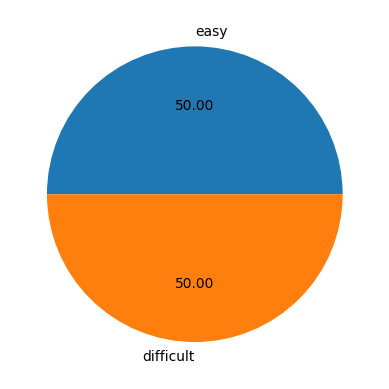

In [ ]:
plt.pie(data1['readability'].value_counts(), labels=['easy', 'difficult'],autopct="%0.2f")
plt.show()

**Feature Extraction, Train and Test Split, Model Building using Logistic Regression and Evaluation**

In [ ]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(data1['cleaned_content'])
Y = data1['readability']

# Splitting training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.18,random_state=42) # 15% for testing

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Printing metrics
print(f"Accuracy of Logistic Regression: {accuracy}")
print(f"Precision of Logistic Regression: {precision}")
print(f"Recall of Logistic Regression: {recall}")
print(f"F1 Score of Logistic Regression: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy of Logistic Regression: 0.75
Precision of Logistic Regression: 0.746031746031746
Recall of Logistic Regression: 0.746031746031746
F1 Score of Logistic Regression: 0.746031746031746
Confusion Matrix:
[[5 2]
 [2 7]]
Classification Report:
              precision    recall  f1-score   support

   difficult       0.71      0.71      0.71         7
        easy       0.78      0.78      0.78         9

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



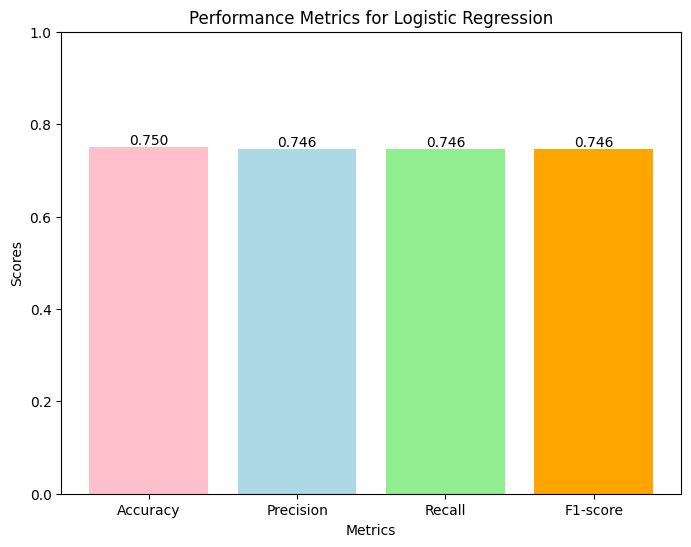

In [ ]:
# Assigning metrics and scores from variables
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plotting the scores for the Logistic Regression model
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['pink', 'lightblue', 'lightgreen', 'orange'])

# Adding the scores on top of the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f'{score:.3f}', va='bottom', ha='center', color='black')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for Logistic Regression')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for scores
plt.show()

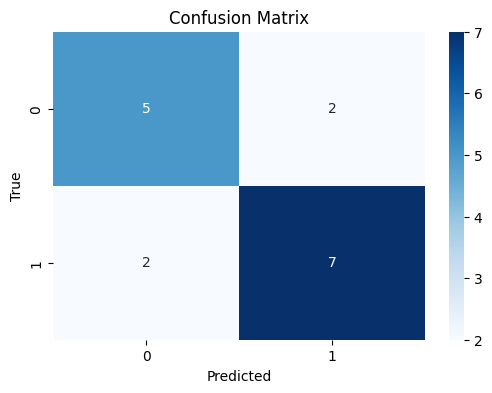

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Prediction**

In [ ]:
input= ["Named-entity recognition (NER) (also known as (named) entity identification, entity chunking, and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc."]
if input[0] != "":
    processed_text = clean_wiki_text(input[0])
    prediction = model.predict(tfidf.transform([processed_text]))
    if prediction.size > 0:
        if prediction[0] == 'easy':
            print("The readability is classified as easy.")
        else:
            print("The readability is classified as difficult.")
else:
    print("Input is Empty")

The readability is classified as easy.


In [ ]:
input= ["Information retrieval (IR) in computing and information science is the task of identifying and retrieving information system resources that are relevant to an information need. "]
if input[0] != "":
    processed_text = clean_wiki_text(input[0])
    prediction = model.predict(tfidf.transform([processed_text]))
    if prediction.size > 0:
        if prediction[0] == 'easy':
            print("The readability is classified as easy.")
        else:
            print("The readability is classified as difficult.")
else:
    print("Input is Empty")

The readability is classified as difficult.


In [ ]:
input= [""]
if input[0] != "":
    processed_text = clean_wiki_text(input[0])
    prediction = model.predict(tfidf.transform([processed_text]))
    if prediction.size > 0:
        if prediction[0] == 'easy':
            print("The readability is classified as easy.")
        else:
            print("The readability is classified as difficult.")
else:
    print("Input is Empty")

Input is Empty
